<a href="https://colab.research.google.com/github/AdithiDesai/TransferLearning_XAI/blob/main/RI_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'covid-cxr-image-dataset-research:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1476403%2F2439818%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240529%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240529T173859Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0469a636ac44658dfbf00d4175fbd21c2204d9b356772c6e358094bb772f015fc6501cf571583502479afa8cd1a37c093dbae1a1d5689a8053e50efc1c349cd43d5fe7fcf5b8946db00262ce83d61a3b182d5259decbd3f179e9481bc2424ea77c82503a19f03c0dae70f8c8e4fd95fcc131db59129ffd786924010e703e9dfe834eeffcb615b51f3d32efe1d76b265be3681cf4c8b586186a4cca15423d3abe9ca113126fb1aa20a09be16b7c9edbb3012b7270dbbeccd66c324fe399072d4c0bb6c15df739f272dd792b79c3a78fb6f7a47c66eb85631fe5a0c2b19c398352711b8abd960b02dac4fa5845bdf356ace4dae2bc564c2a75d8b0f34032c2cb25'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 600260057 bytes downloaded
Downloaded and uncompressed: covid-cxr-image-dataset-research
Data source import complete.


In [2]:
import tensorflow
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adamax
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,Adadelta,RMSprop,Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np
import argparse
import cv2
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
import scipy
import skimage
from skimage.transform import resize
import random
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adamax
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,Adadelta,RMSprop,Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np
import argparse
import cv2
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
import scipy
import skimage
from skimage.transform import resize
import random
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/IM-0511-0001.jpeg
/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/NORMAL2-IM-0539-0001.jpeg
/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/NORMAL2-IM-0619-0001.jpeg
/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/IM-0009-0001.jpeg
/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/NORMAL2-IM-0983-0001.jpeg
/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/IM-0183-0001.jpeg
/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/NORMAL2-IM-0776-0001.jpeg
/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/NORMAL2-IM-0989-0001.jpeg
/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/NORMAL2-IM-0895-0001.jpeg
/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/IM-0455-0001.jpeg
/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/IM-0383-0001.jpeg
/kaggle/input/covid-cxr-image-dataset-r

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def Images_details_Print_data(data, path):
    print(" ====== Images in: ", path)
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['max_width'] = max(width, data['max_height'])
        data['min_height'] = min(height, data['min_height'])
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)

In [5]:
COV_DIR = "/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/covid/"
NORM_DIR = "/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/"
VIR_DIR = "/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/virus/"

In [6]:
Images_details(NORM_DIR)

 ====== Images in:  /kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/
images_count:	668
min_width:	1040
max_width:	2628
min_height:	650
max_height:	2628


In [7]:
Images_details(COV_DIR)

 ====== Images in:  /kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/covid/
images_count:	536
min_width:	240
max_width:	4095
min_height:	237
max_height:	4095


In [8]:
Images_details(VIR_DIR)

 ====== Images in:  /kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/virus/
images_count:	619
min_width:	384
max_width:	2304
min_height:	127
max_height:	2304


In [9]:
Cimages = os.listdir(COV_DIR)
Nimages = os.listdir(NORM_DIR)
Vimages = os.listdir(VIR_DIR)

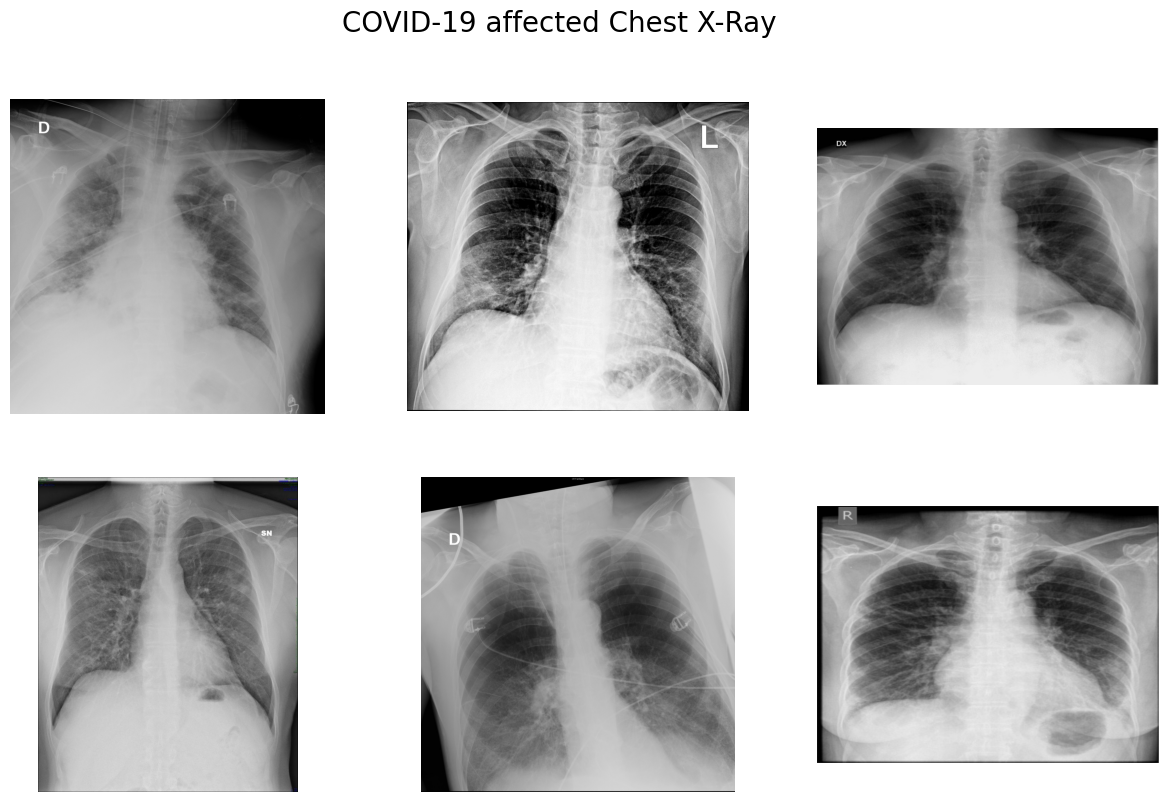

In [10]:
sample_images = random.sample(Cimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/covid/'+sample_images[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('COVID-19 affected Chest X-Ray',fontsize=20)
plt.show()

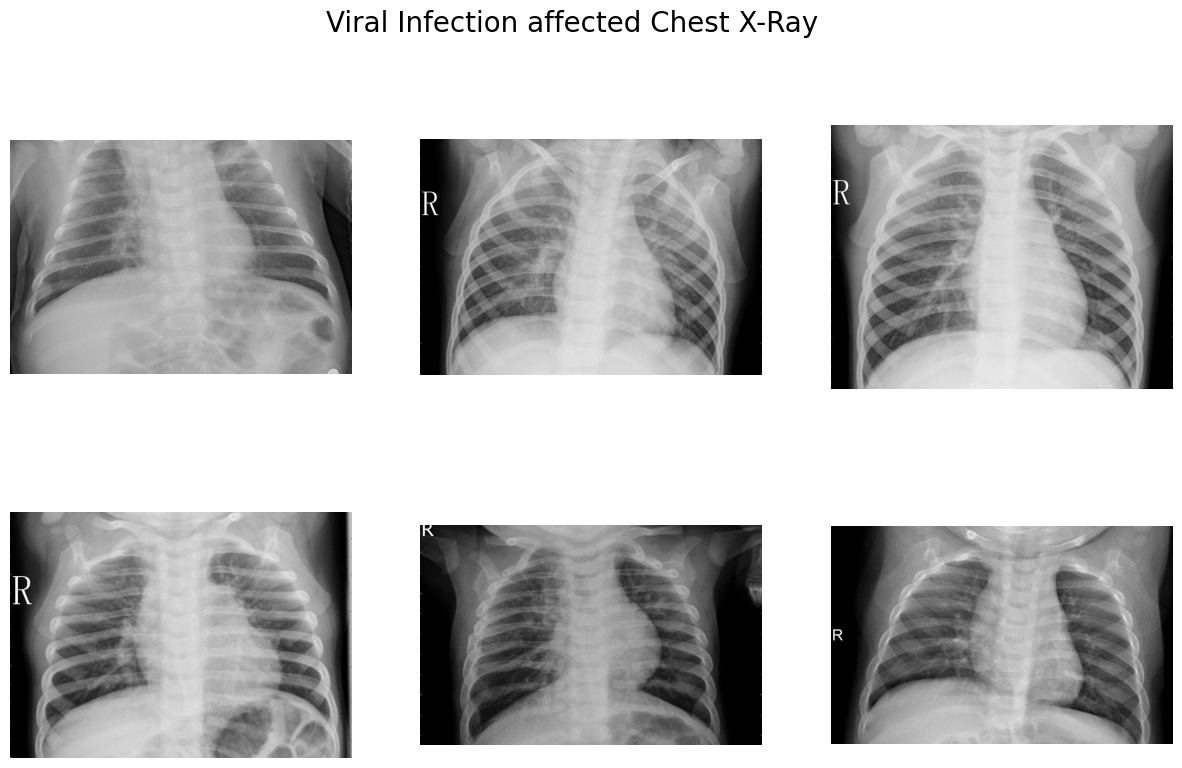

In [11]:
sample_images = random.sample(Vimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/virus/'+sample_images[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Viral Infection affected Chest X-Ray',fontsize=20)
plt.show()

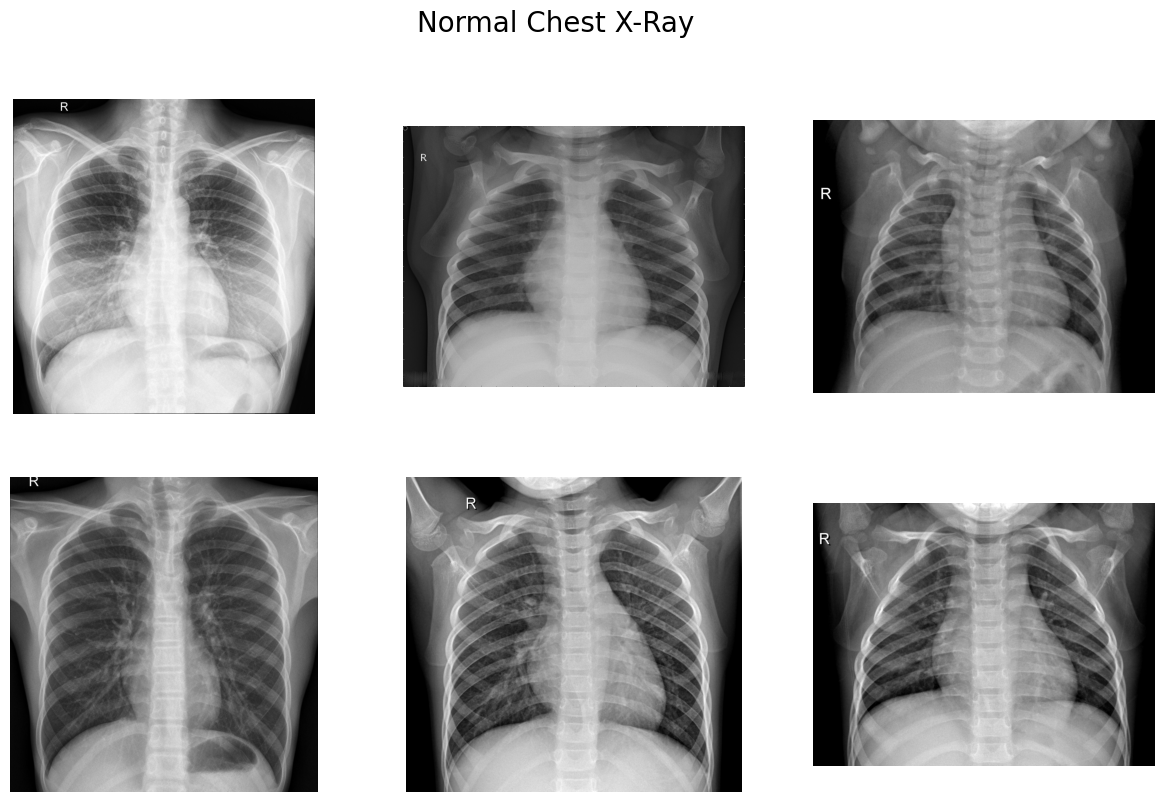

In [12]:
sample_images = random.sample(Nimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/'+sample_images[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Normal Chest X-Ray',fontsize=20)
plt.show()

In [13]:
## Enhancing the CXR Images using White balance and CLAHE

def wb(channel, perc = 0.05):
    mi, ma = (np.percentile(channel, perc), np.percentile(channel,100.0-perc))
    channel = np.uint8(np.clip((channel-mi)*255.0/(ma-mi), 0, 255))
    return channel

## Data preparation

In [14]:
data=[]
labels=[]
Uninfected=os.listdir("/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/")
for a in Uninfected:
	# extract the class label from the filename


	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread("/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/"+a)
	imWB  = np.dstack([wb(channel, 0.05) for channel in cv2.split(image)] )
	gray_image = cv2.cvtColor(imWB, cv2.COLOR_BGR2GRAY)
	clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
	img_clahe1 = clahe.apply(gray_image)
	img = cv2.cvtColor(img_clahe1, cv2.COLOR_GRAY2RGB)
	image = cv2.resize(img, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(0)

Covid=os.listdir("/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/covid/")
for b in Covid:
	# extract the class label from the filename


	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread("/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/covid/"+b)
	imWB  = np.dstack([wb(channel, 0.05) for channel in cv2.split(image)] )
	gray_image = cv2.cvtColor(imWB, cv2.COLOR_BGR2GRAY)
	clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
	img_clahe1 = clahe.apply(gray_image)
	img = cv2.cvtColor(img_clahe1, cv2.COLOR_GRAY2RGB)
	image = cv2.resize(img, (224, 224))
	# update the data and labels lists, respectively
	data.append(image)
	labels.append(1)

Virus=os.listdir("/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/virus/")
for c in Virus:
	# extract the class label from the filename


	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread("/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/virus/"+c)
	imWB  = np.dstack([wb(channel, 0.05) for channel in cv2.split(image)] )
	gray_image = cv2.cvtColor(imWB, cv2.COLOR_BGR2GRAY)
	clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
	img_clahe1 = clahe.apply(gray_image)
	img = cv2.cvtColor(img_clahe1, cv2.COLOR_GRAY2RGB)
	image = cv2.resize(img, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(2)

## Image normalization

In [15]:
# data normalization by dividing image pixels by 255
data = np.array(data) / 255.0
labels = np.array(labels)

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(data, labels,stratify=labels,
	test_size=0.20,  random_state=42)

In [17]:
trainAug  = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

## Model Building

In this kernel I will be using Depthwise separable CNNs

In [19]:
inputs = Input(shape=(224, 224,3))
# First conv block
x = Conv2D(filters=4, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(filters=4, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# second conv block
x = Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# third conv block
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPool2D(pool_size=(2, 2))(x)


# first separable conv block
x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)


# second separable conv block
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)


# third separable conv block
x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# fourth separable conv block
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)


# fifth separable conv block
x = SeparableConv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# FC layer
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(rate=0.7)(x)
x = Dense(units=128, activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Dense(units=64, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(units=32, activation='relu')(x)
x = Dropout(rate=0.3)(x)

# Output layer
output = Dense(units=3, activation='softmax')(x)

# Creating model and compiling
model = Model(inputs=inputs, outputs=output)

EPOCHS = 50
BS = 16


# compile our model
print("[INFO] compiling model...")
opt = "adam"
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
callbacks = [ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True),
             EarlyStopping(monitor='val_loss', patience=5)]
model.summary()

[INFO] compiling model...
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 conv2d_11 (Conv2D)          (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 112, 112, 16)      0         
 ng2D)                                                           
                                                                 
 separable_conv2d_10 (Separ  (None, 112, 112, 32)      688       
 ableConv2D)                                                     
                                                                 
 separable_conv2d_11 (Separ  (Non

In [20]:
BS = 16
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=callbacks)

[INFO] training head...


<ipython-input-20-b424639026dd>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(


Epoch 1/50
91/91 [==============================] - ETA: 0s - loss: 1.0175 - accuracy: 0.4362

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


91/91 [==============================] - 212s 2s/step - loss: 1.0175 - accuracy: 0.4362 - val_loss: 1.1455 - val_accuracy: 0.2932
Epoch 2/50
91/91 [==============================] - 200s 2s/step - loss: 0.7119 - accuracy: 0.6574 - val_loss: 1.4354 - val_accuracy: 0.2932
Epoch 3/50
91/91 [==============================] - 201s 2s/step - loss: 0.5949 - accuracy: 0.7656 - val_loss: 1.5395 - val_accuracy: 0.2932
Epoch 4/50
91/91 [==============================] - 198s 2s/step - loss: 0.5165 - accuracy: 0.8058 - val_loss: 1.1157 - val_accuracy: 0.3397
Epoch 5/50
91/91 [==============================] - 200s 2s/step - loss: 0.4845 - accuracy: 0.8433 - val_loss: 1.2255 - val_accuracy: 0.2932
Epoch 6/50
91/91 [==============================] - 197s 2s/step - loss: 0.3967 - accuracy: 0.8724 - val_loss: 1.2530 - val_accuracy: 0.2932
Epoch 7/50
91/91 [==============================] - 189s 2s/step - loss: 0.4065 - accuracy: 0.8786 - val_loss: 1.5361 - val_accuracy: 0.6055
Epoch 8/50
91/91 [======

In [22]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/saved_models/before_tl.h5')

## Model Evaluation

In [24]:
## Loading best model based on its weights

from numpy import loadtxt
from tensorflow.keras.models import load_model
#model = load_model('.mdl_wts.hdf5')
model = load_model('/content/drive/MyDrive/saved_models/before_tl.h5')
score = model.evaluate(testX, testY,verbose=1)

print(score)

12/12 [==============================] - 38s 3s/step - loss: 0.7002 - accuracy: 0.7808
[0.7002471089363098, 0.7808219194412231]


23/23 [==============================] - 13s 552ms/step


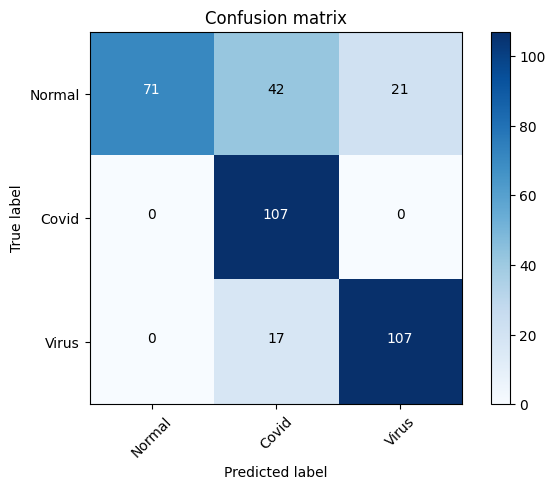

In [25]:
import itertools
pred_Y = model.predict(testX, batch_size = 8, verbose = True)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    target_names =['Normal','Covid','Virus']

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(testX, batch_size=BS)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred_Y,axis = 1)
# Convert validation observations to one hot vectors
# compute the confusion matrix
confusion_mtx = confusion_matrix(testY, Y_pred_classes)



# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))

## Classification Report

In [26]:
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)


# show a nicely formatted classification report
print(classification_report(testY, predIdxs,target_names=['normal','covid','virus']))

23/23 [==============================] - 10s 427ms/step
              precision    recall  f1-score   support

      normal       1.00      0.53      0.69       134
       covid       0.64      1.00      0.78       107
       virus       0.84      0.86      0.85       124

    accuracy                           0.78       365
   macro avg       0.83      0.80      0.78       365
weighted avg       0.84      0.78      0.77       365



## Plotting ROC-AUC Curve

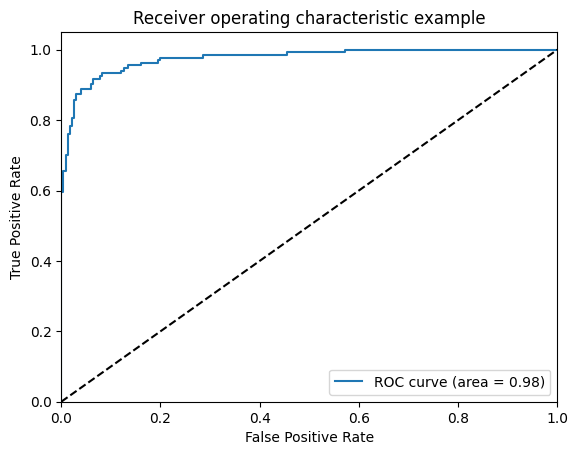

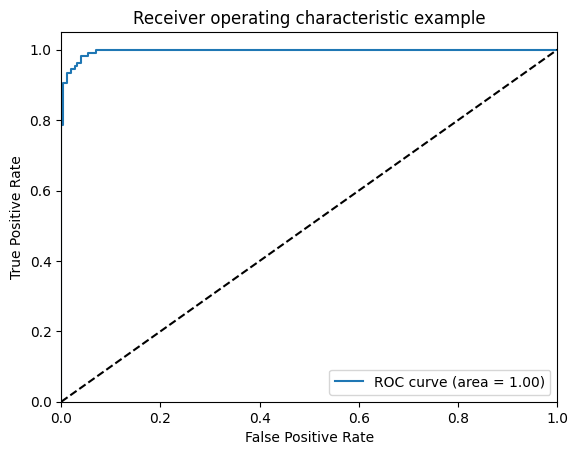

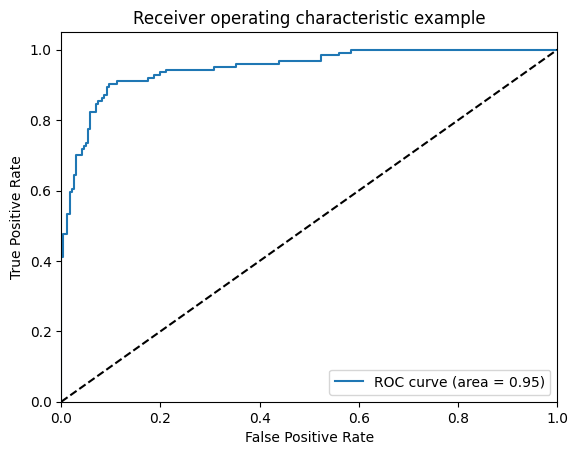

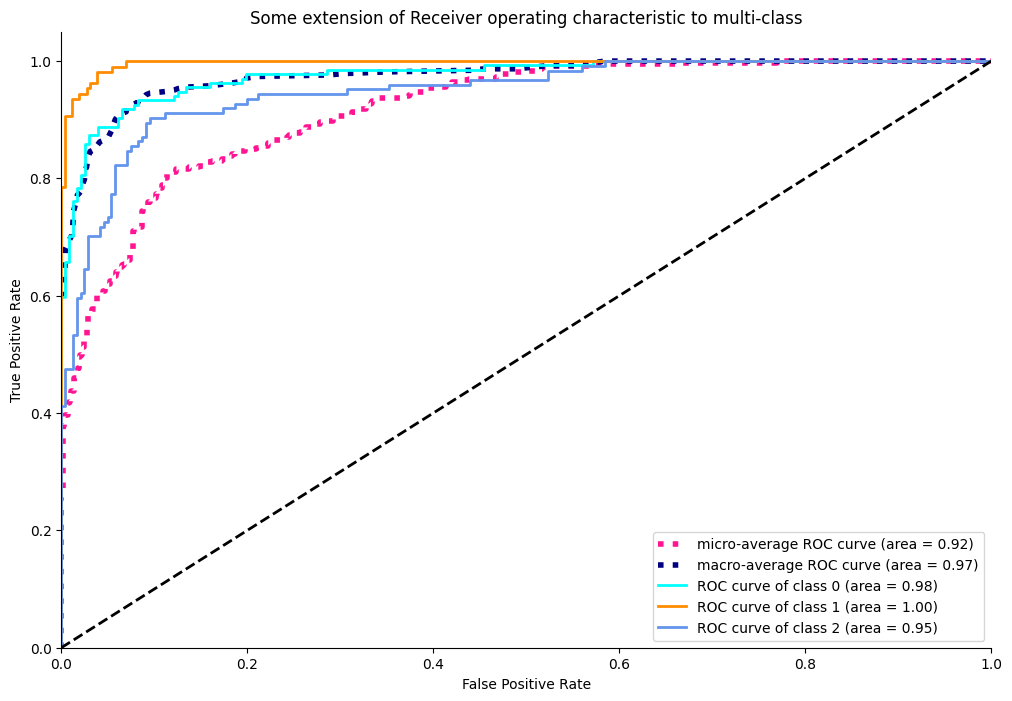

In [27]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_test = pd.get_dummies(testY)
y_test = np.array(y_test)

n_classes = 3


# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred_Y[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred_Y.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
fig = plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
sns.despine()
plt.show()

In [28]:
def specificity(y_true, y_pred):
    """
    param:
    y_pred - Predicted labels
    y_true - True labels
    Returns:
    Specificity score
    """
    neg_y_true = 1 - y_true
    neg_y_pred = 1 - y_pred
    fp = K.sum(neg_y_true * y_pred)
    tn = K.sum(neg_y_true * neg_y_pred)
    specificity = tn / (tn + fp + K.epsilon())
    return specificity

In [29]:
print(specificity(y_test, Y_pred))

tf.Tensor(0.8708748584560447, shape=(), dtype=float64)


## Plotting Model Prediction

In [30]:
# getting predictions on val set.
pred=model.predict(testX, batch_size=BS)
Y_pred_classes=np.argmax(pred,axis=1)

Y_true = np.argmax(testY,axis = 0)

# Mapping Classes
classes = {0 : 'Normal',
            1 : 'COVID',
            2 : 'Viral'}

23/23 [==============================] - 10s 423ms/step


In [31]:
incorrect = []
for i in range(len(testY)):
    if(not Y_pred_classes[i] == testY[i]):
        incorrect.append(i)
    if(len(incorrect) == 22):
        break

correct = []
for i in range(len(testY)):
    if(Y_pred_classes[i] == testY[i]):
        correct.append(i)
    if(len(correct) == 100):
        break

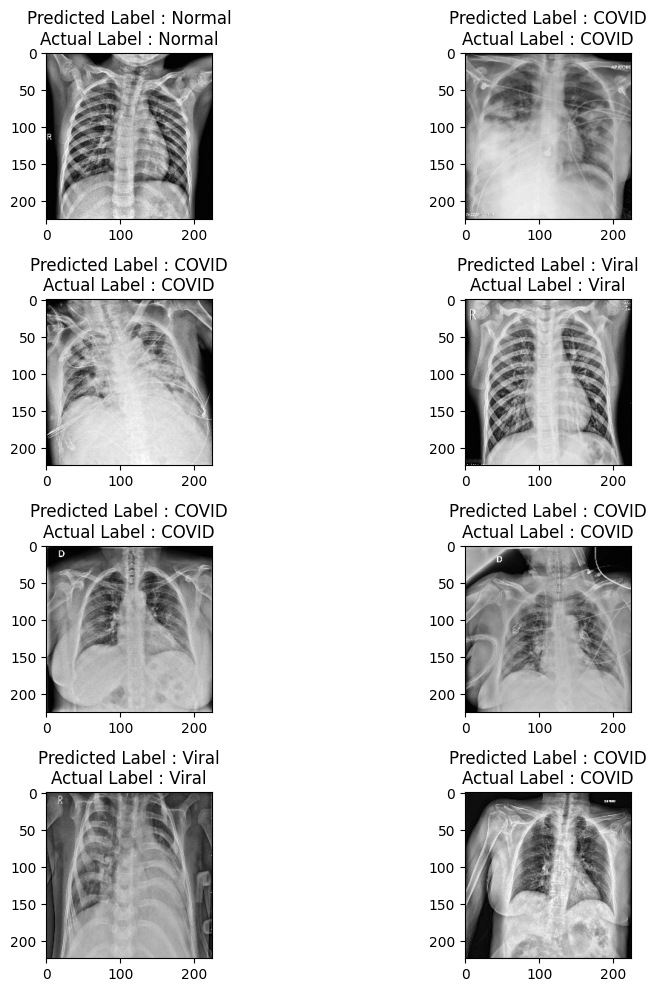

In [32]:
fig, ax = plt.subplots(4,2, figsize=(12,10))
fig.set_size_inches(10,10)
ax[0,0].imshow(testX[correct[0]], cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[0]]]) + "\n"+"Actual Label : " +
                 str(classes[testY[correct[0]]]))

ax[0,1].imshow(testX[correct[1]], cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[1]]]) + "\n"+"Actual Label : " +
                 str(classes[testY[correct[1]]]))
ax[1,0].imshow(testX[correct[2]], cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[2]]]) + "\n"+"Actual Label : " +
                 str(classes[testY[correct[2]]]))
ax[1,1].imshow(testX[correct[3]], cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[3]]]) + "\n"+"Actual Label : " +
                 str(classes[testY[correct[3]]]))
ax[2,0].imshow(testX[correct[4]], cmap='gray')
ax[2,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[4]]]) + "\n"+"Actual Label : " +
                 str(classes[testY[correct[4]]]))
ax[2,1].imshow(testX[correct[5]], cmap='gray')
ax[2,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[5]]]) + "\n"+"Actual Label : " +
                 str(classes[testY[correct[5]]]))
ax[3,0].imshow(testX[correct[6]], cmap='gray')
ax[3,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[6]]]) + "\n"+"Actual Label : " +
                 str(classes[testY[correct[6]]]))
ax[3,1].imshow(testX[correct[7]], cmap='gray')
ax[3,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[7]]]) + "\n"+"Actual Label : " +
                 str(classes[testY[correct[7]]]))
fig.tight_layout(pad=1.0)
plt.show()

# **Transfer Learning**

In [36]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load the pre-trained model
base_model = load_model('/content/drive/MyDrive/RadImageNet-InceptionV3_notop.h5')

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Assuming trainY and testY are your labels
# Encode the labels to categorical format
trainY_encoded = to_categorical(trainY)
testY_encoded = to_categorical(testY)

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)  # Change 3 to your number of classes if different

# Create final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalization_94

In [37]:
# Train the model with your dataset
model.fit(trainX, trainY_encoded, epochs=20, batch_size=32, validation_data=(testX, testY_encoded))

Epoch 1/20
46/46 [==============================] - 279s 6s/step - loss: 0.6979 - accuracy: 0.7627 - val_loss: 0.5462 - val_accuracy: 0.7425
Epoch 2/20
46/46 [==============================] - 260s 6s/step - loss: 0.4574 - accuracy: 0.8340 - val_loss: 0.4046 - val_accuracy: 0.8301
Epoch 3/20
46/46 [==============================] - 267s 6s/step - loss: 0.3908 - accuracy: 0.8690 - val_loss: 0.3550 - val_accuracy: 0.8548
Epoch 4/20
46/46 [==============================] - 257s 6s/step - loss: 0.3480 - accuracy: 0.8731 - val_loss: 0.3402 - val_accuracy: 0.8630
Epoch 5/20
46/46 [==============================] - 261s 6s/step - loss: 0.3275 - accuracy: 0.8868 - val_loss: 0.3011 - val_accuracy: 0.8740
Epoch 6/20
46/46 [==============================] - 260s 6s/step - loss: 0.3012 - accuracy: 0.8978 - val_loss: 0.2841 - val_accuracy: 0.8932
Epoch 7/20
46/46 [==============================] - 221s 5s/step - loss: 0.2909 - accuracy: 0.8909 - val_loss: 0.2757 - val_accuracy: 0.8932
Epoch 8/20
46

In [38]:
model.save('/content/drive/MyDrive/saved_models/radimage_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Transfer Learning Model Evaluation

In [39]:
## Loading best model based on its weights

from numpy import loadtxt
from tensorflow.keras.models import load_model
#model = load_model('.mdl_wts.hdf5')
model = load_model('/content/drive/MyDrive/saved_models/radimage_model.h5')
score = model.evaluate(testX, testY_encoded,verbose=1)

print(score)

12/12 [==============================] - 46s 4s/step - loss: 0.2156 - accuracy: 0.9068
[0.2155676633119583, 0.9068493247032166]


23/23 [==============================] - 46s 2s/step


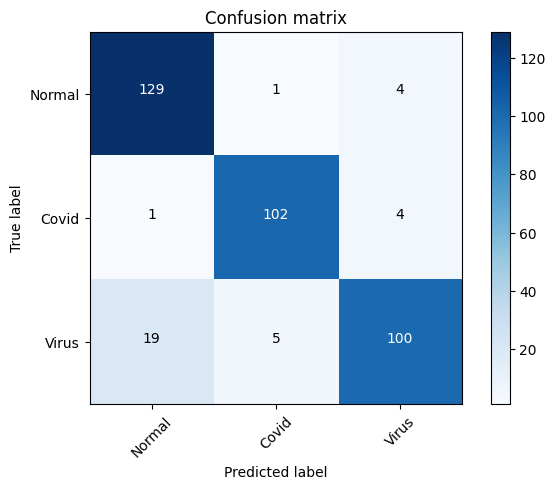

In [40]:
import itertools
pred_Y = model.predict(testX, batch_size = 8, verbose = True)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    target_names =['Normal','Covid','Virus']

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(testX, batch_size=BS)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred_Y,axis = 1)
# Convert validation observations to one hot vectors
# compute the confusion matrix
confusion_mtx = confusion_matrix(testY, Y_pred_classes)



# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))

# Transfer Learning Classification Report

In [41]:
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)


# show a nicely formatted classification report
print(classification_report(testY, predIdxs,target_names=['normal','covid','virus']))

23/23 [==============================] - 55s 2s/step
              precision    recall  f1-score   support

      normal       0.87      0.96      0.91       134
       covid       0.94      0.95      0.95       107
       virus       0.93      0.81      0.86       124

    accuracy                           0.91       365
   macro avg       0.91      0.91      0.91       365
weighted avg       0.91      0.91      0.91       365



# Plotting ROC-AUC Curve

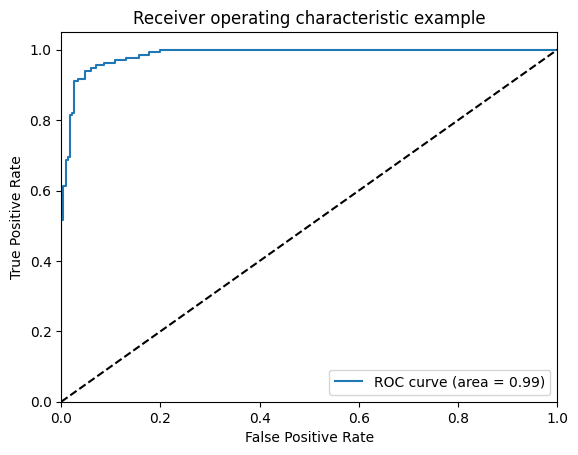

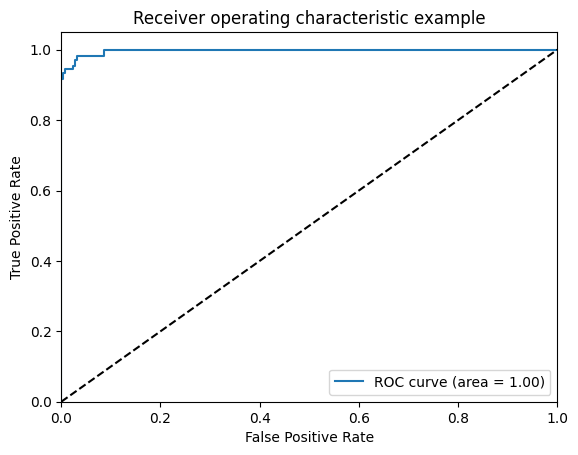

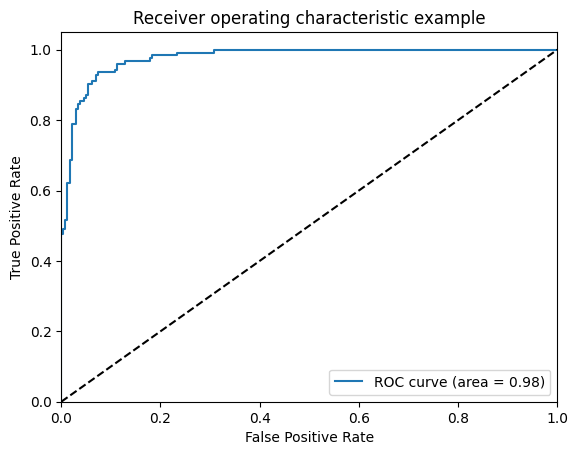

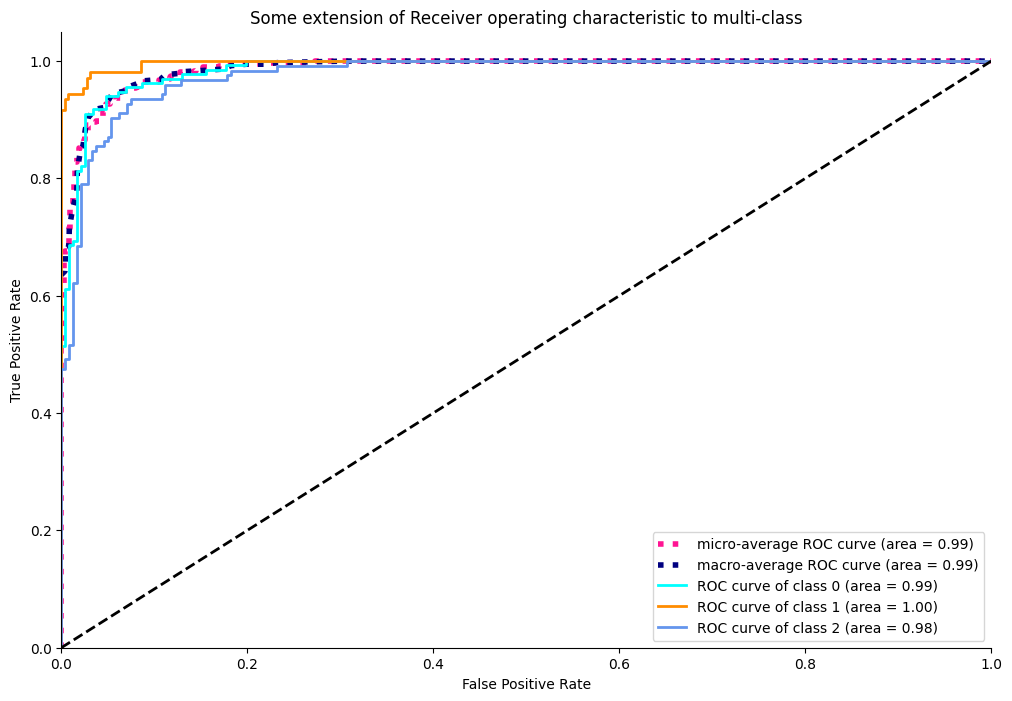

In [42]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_test = pd.get_dummies(testY)
y_test = np.array(y_test)

n_classes = 3


# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred_Y[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred_Y.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
fig = plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
sns.despine()
plt.show()

In [43]:
def specificity(y_true, y_pred):
    """
    param:
    y_pred - Predicted labels
    y_true - True labels
    Returns:
    Specificity score
    """
    neg_y_true = 1 - y_true
    neg_y_pred = 1 - y_pred
    fp = K.sum(neg_y_true * y_pred)
    tn = K.sum(neg_y_true * neg_y_pred)
    specificity = tn / (tn + fp + K.epsilon())
    return specificity

In [44]:
print(specificity(y_test, Y_pred))

tf.Tensor(0.9330200899880601, shape=(), dtype=float64)


# Plotting Model Prediction Transfer Learning

In [45]:
# getting predictions on val set.
pred=model.predict(testX, batch_size=BS)
Y_pred_classes=np.argmax(pred,axis=1)

Y_true = np.argmax(testY,axis = 0)

# Mapping Classes
classes = {0 : 'Normal',
            1 : 'COVID',
            2 : 'Viral'}

23/23 [==============================] - 42s 2s/step


In [46]:

incorrect = []
for i in range(len(testY)):
    if(not Y_pred_classes[i] == testY[i]):
        incorrect.append(i)
    if(len(incorrect) == 22):
        break

correct = []
for i in range(len(testY)):
    if(Y_pred_classes[i] == testY[i]):
        correct.append(i)
    if(len(correct) == 100):
        break

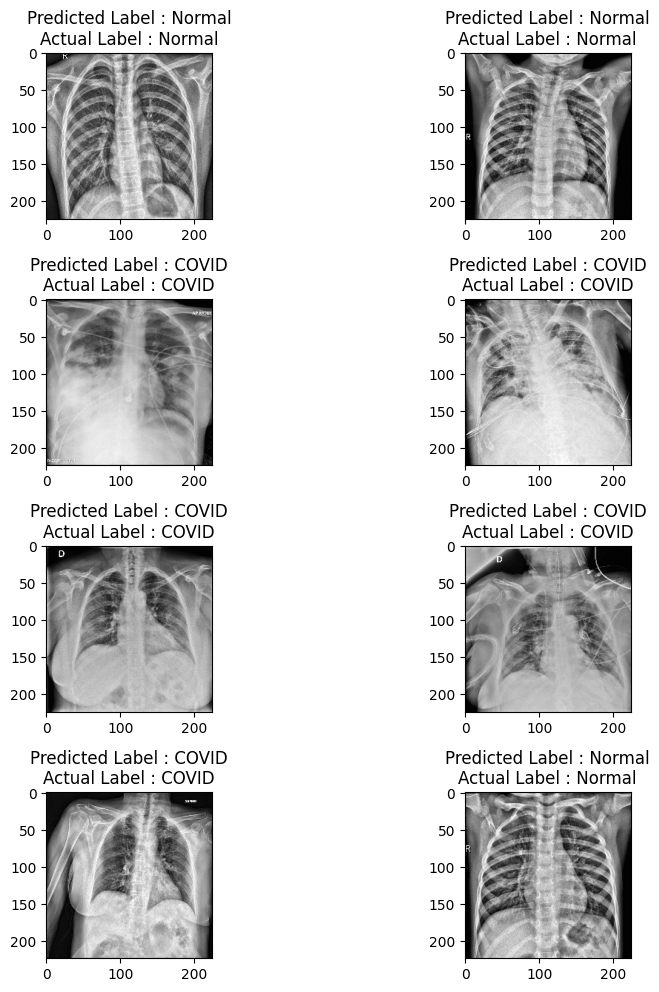

In [47]:

fig, ax = plt.subplots(4,2, figsize=(12,10))
fig.set_size_inches(10,10)
ax[0,0].imshow(testX[correct[0]], cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[0]]]) + "\n"+"Actual Label : " +
                 str(classes[testY[correct[0]]]))

ax[0,1].imshow(testX[correct[1]], cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[1]]]) + "\n"+"Actual Label : " +
                 str(classes[testY[correct[1]]]))
ax[1,0].imshow(testX[correct[2]], cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[2]]]) + "\n"+"Actual Label : " +
                 str(classes[testY[correct[2]]]))
ax[1,1].imshow(testX[correct[3]], cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[3]]]) + "\n"+"Actual Label : " +
                 str(classes[testY[correct[3]]]))
ax[2,0].imshow(testX[correct[4]], cmap='gray')
ax[2,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[4]]]) + "\n"+"Actual Label : " +
                 str(classes[testY[correct[4]]]))
ax[2,1].imshow(testX[correct[5]], cmap='gray')
ax[2,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[5]]]) + "\n"+"Actual Label : " +
                 str(classes[testY[correct[5]]]))
ax[3,0].imshow(testX[correct[6]], cmap='gray')
ax[3,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[6]]]) + "\n"+"Actual Label : " +
                 str(classes[testY[correct[6]]]))
ax[3,1].imshow(testX[correct[7]], cmap='gray')
ax[3,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[7]]]) + "\n"+"Actual Label : " +
                 str(classes[testY[correct[7]]]))
fig.tight_layout(pad=1.0)
plt.show()

## Model Explanation

Analyzing Correct predictions by Model Using LIME

In [48]:
!pip install lime
import lime
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(testX[correct[5]], model.predict, top_labels=5, hide_color=0, num_samples=100)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=98364b13ab959bf1090f7c47c41c121031ef416e2001518c50434d03c5c0124a
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


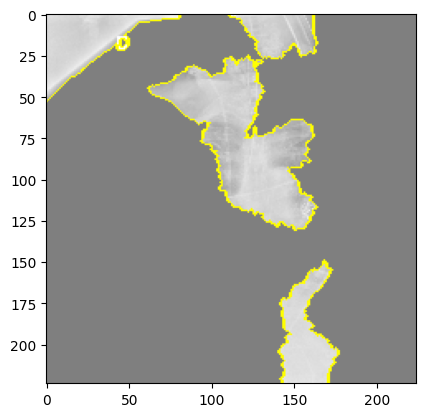

In [78]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

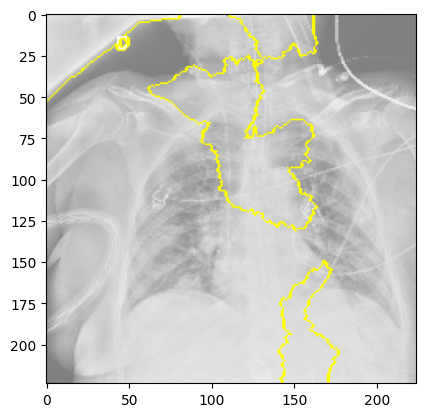

In [76]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

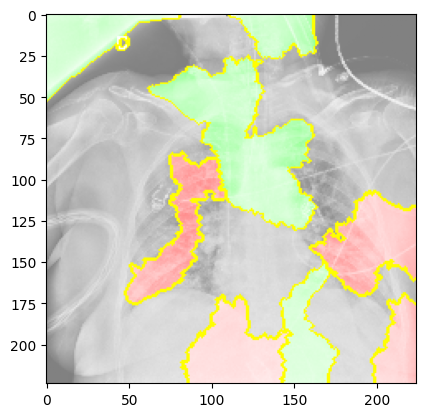

In [77]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## GradCAM Heatmap

In [50]:
!pip install tf-keras-vis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 1.6 MB/s eta 0:00:00


<ipython-input-51-6198f22981bd>:18: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.
  activation = activation_maximization(loss, callbacks=[Print(interval=100)])


Steps: 100	Scores: [1858280.375],	Regularization: [('TotalVariation2D', [38.80103302001953]), ('Norm', [53.04776382446289])]
Steps: 200	Scores: [2576685.0],	Regularization: [('TotalVariation2D', [36.89944076538086]), ('Norm', [58.874961853027344])]


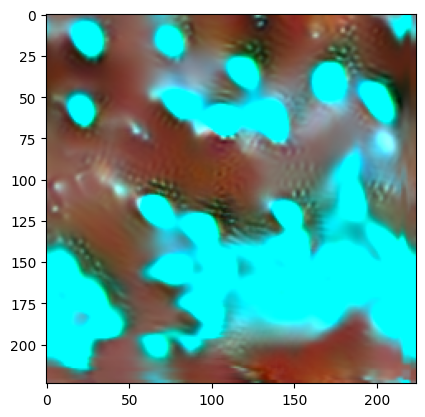

In [51]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.utils.callbacks import Print
import numpy as np

# Define a modifier to replace the softmax function of the last layer with a linear function.
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear

# Create the Activation Maximization object
activation_maximization = ActivationMaximization(model, model_modifier)

# Define the loss function. For example, 1 is the index of the class you want to maximize.
loss = lambda x: K.mean(x[:, 1])

# Generate the maximum activation with debug printing
activation = activation_maximization(loss, callbacks=[Print(interval=100)])

# Convert the generated activation to a NumPy array and then to uint8
image = np.array(activation[0]).astype(np.uint8)

# If needed, you can display or save the image using an appropriate library, such as matplotlib or PIL
import matplotlib.pyplot as plt

plt.imshow(image)
plt.show()


In [52]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.utils.callbacks import Print

import numpy as np
# Convert EagerTensor to NumPy array
image = np.array(activation[0]).astype(np.uint8)

# Define modifier to replace a softmax function of the last layer to a linear function.
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear

# Create Activation Maximization object
activation_maximization = ActivationMaximization(model, model_modifier)

# Define loss function. 20 is the imagenet index corresponding to ouzel.
loss = lambda x: K.mean(x[:, 1])

# Generate max activation with debug printing
activation = activation_maximization(loss, callbacks=[Print(interval=100)])

<ipython-input-52-296c6d4e793b>:21: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.
  activation = activation_maximization(loss, callbacks=[Print(interval=100)])


Steps: 100	Scores: [2006190.0],	Regularization: [('TotalVariation2D', [40.03837585449219]), ('Norm', [54.14564895629883])]
Steps: 200	Scores: [2777958.75],	Regularization: [('TotalVariation2D', [37.46004867553711]), ('Norm', [58.02105712890625])]


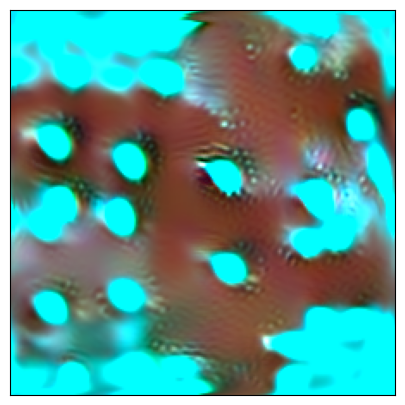

In [53]:
# Convert EagerTensor to NumPy array
image = activation[0].numpy().astype(np.uint8)

f, ax = plt.subplots(figsize=(10, 5), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)
plt.show()

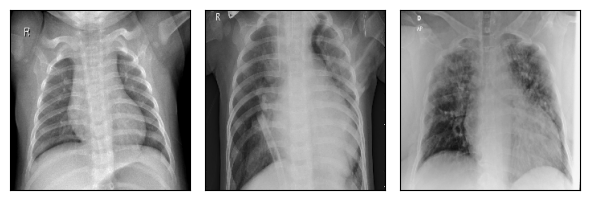

In [54]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import load_img

# Load images
img1 = load_img('/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/NORMAL2-IM-0388-0001.jpeg', target_size=(224, 224))
img2 = load_img('/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/virus/person704_virus_1301.jpeg', target_size=(224, 224))
img3 = load_img('/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/covid/covid1900167.png', target_size=(224, 224))

images = np.asarray([np.array(img1), np.array(img2),np.array(img3)])

# Prepare datasets
X = preprocess_input(images)

# Render
subprot_args = {
    'nrows': 1,
    'ncols': 3,
    'figsize': (6, 3),
    'subplot_kw': {'xticks': [], 'yticks': []}
}
f, ax = plt.subplots(**subprot_args)
for i in range(len(images)):
    ax[i].imshow(images[i])
plt.tight_layout()
plt.show()

In [55]:
# Define loss function. 1 is the imagenet index corresponding to Goldfish,
# And 294 is one corresponding to Bear.
def loss(output):
    return (output[1][1], output[0][1])

# Define modifier to replace a softmax function of the last layer to a linear function.
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
    return m

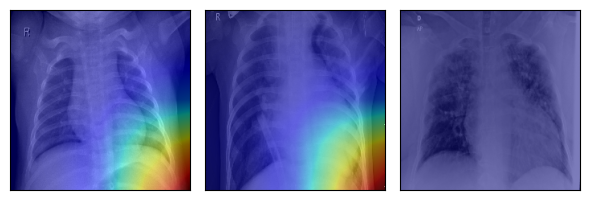

In [56]:
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize

# Create Gradcam object
gradcam = Gradcam(model, model_modifier, clone=False)

# Generate heatmap with GradCAM
cam = gradcam(loss, X)
cam = normalize(cam)

f, ax = plt.subplots(**subprot_args)
for i in range(len(cam)):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
plt.tight_layout()
plt.show()

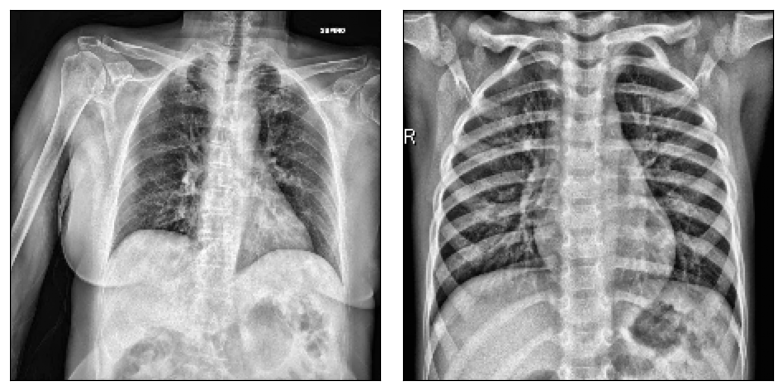

In [57]:
ins = np.asarray([np.array(testX[correct[6]]), np.array(testX[correct[7]])])
S = preprocess_input(images)

# Render
subprot_args = {
    'nrows': 1,
    'ncols': 2,
    'figsize': (8, 4),
    'subplot_kw': {'xticks': [], 'yticks': []}
}
f, ax = plt.subplots(**subprot_args)
for i in range(len(ins)):
    ax[i].imshow(ins[i])
plt.tight_layout()
plt.show()

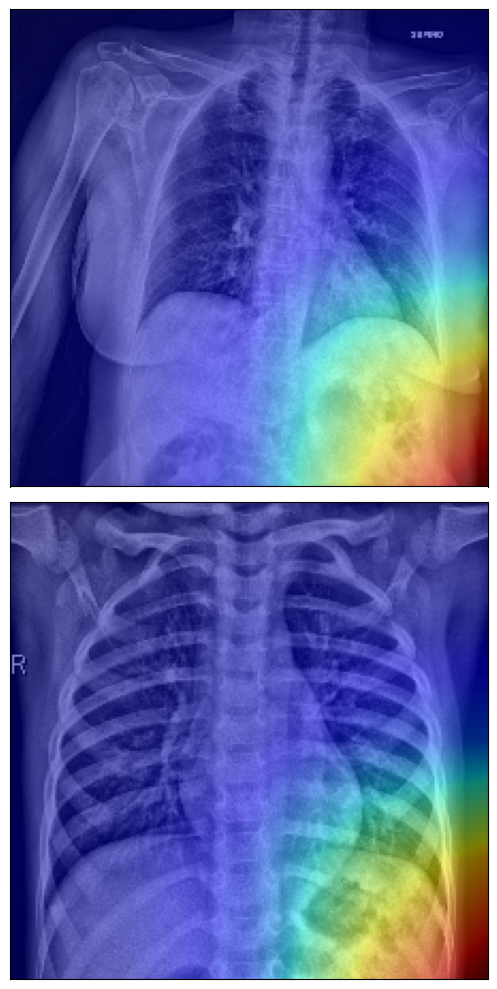

In [58]:
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize

# Create Gradcam object
gradcam = Gradcam(model, model_modifier, clone=False)

# Generate heatmap with GradCAM
cam = gradcam(loss, S)
cam = normalize(cam)

# Check the size of cam and ins arrays
num_samples = min(len(cam), len(ins))

# Plot the heatmap overlaid on the input images
f, ax = plt.subplots(nrows=num_samples, figsize=(10, 5 * num_samples), subplot_kw={'xticks': [], 'yticks': []})
for i in range(num_samples):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].imshow(ins[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
plt.tight_layout()
plt.show()


## Saliency Maps

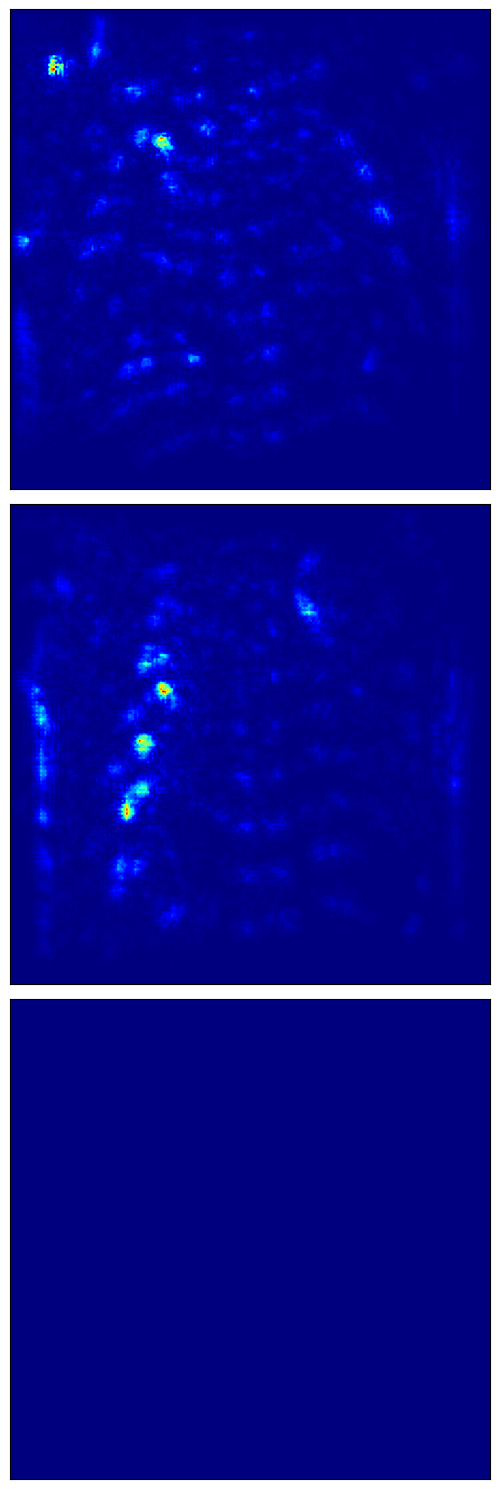

In [59]:
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize

# Create Saliency object
saliency = Saliency(model, model_modifier, clone=False)

# Generate saliency map
saliency_map = saliency(loss, S)
saliency_map = normalize(saliency_map)

# Check the size of saliency_map array
num_samples = len(saliency_map)

# Plot the saliency map for each sample
f, ax = plt.subplots(nrows=num_samples, figsize=(10, 5 * num_samples), subplot_kw={'xticks': [], 'yticks': []})
for i in range(num_samples):
    ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
plt.show()


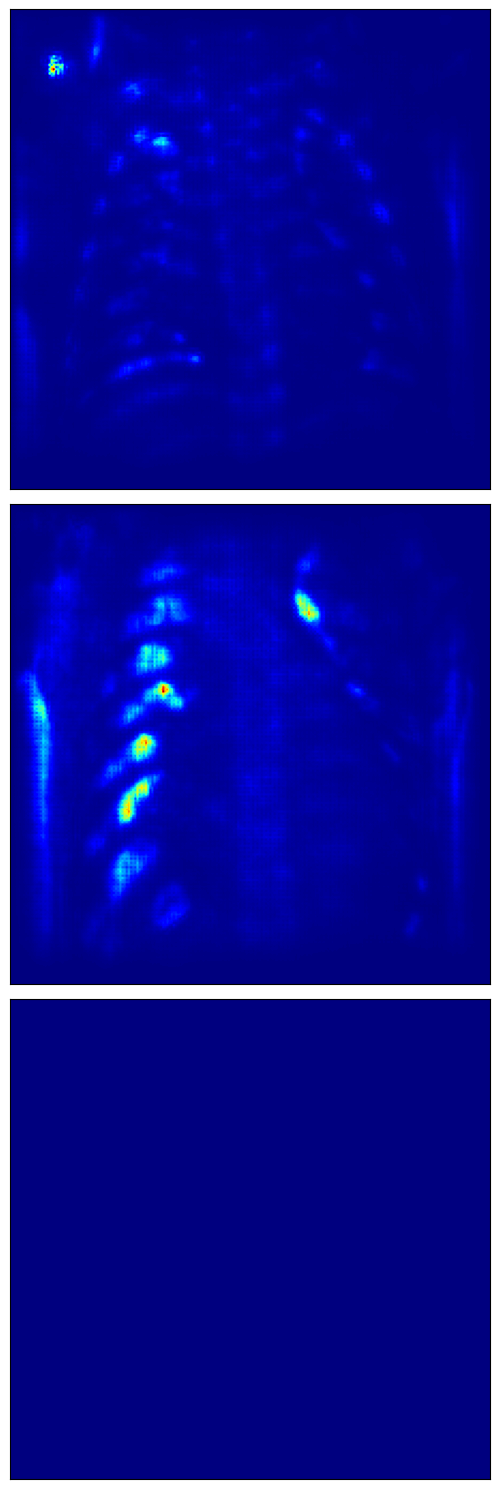

In [60]:
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize

# Create Saliency object
saliency = Saliency(model, model_modifier, clone=False)

# Generate saliency map with smoothing that reduces noise by adding noise
saliency_map = saliency(loss, S, smooth_samples=100)
saliency_map = normalize(saliency_map)

# Check the size of saliency_map array
num_samples = len(saliency_map)

# Plot the saliency map for each sample
f, ax = plt.subplots(nrows=num_samples, figsize=(10, 5 * num_samples), subplot_kw={'xticks': [], 'yticks': []})
for i in range(num_samples):
    ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
plt.show()

